In [1]:
import pandas as pd

pk = pd.read_csv('pokemon_data.csv')

pk.head()

,id,identifier,generation_id,evolution_chain_id,gender_rate,capture_rate,base_happiness,has_gender_differences,type1,type2,attack,defense,hp,special-attack,special-defense,speed
0,1,bulbasaur,1,1,1,45,70,0,grass,poison,49,49,45,65,65,45
1,2,ivysaur,1,1,1,45,70,0,grass,poison,62,63,60,80,80,60
2,3,venusaur,1,1,1,45,70,1,grass,poison,82,83,80,100,100,80
3,4,charmander,1,2,1,45,70,0,fire,NaN,52,43,39,60,50,65
4,5,charmeleon,1,2,1,45,70,0,fire,NaN,64,58,58,80,65,80


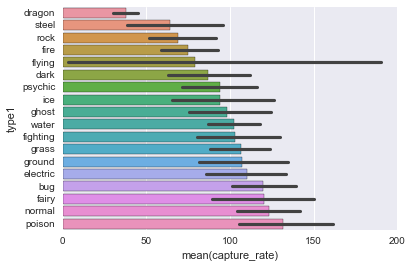

In [2]:
import seaborn as sns

rates = {}
for typ in pk['type1'].unique():
    rates[pk['capture_rate'].loc[pk['type1'] == typ].mean()] = typ

rates = [rates[i] for i in sorted(rates)]
                 
%matplotlib inline
                 
sns.barplot(x=pk['capture_rate'], y=pk['type1'], orient = 'h', order = rates)

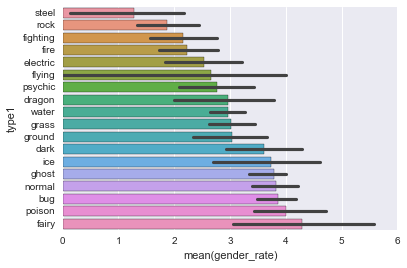

In [15]:
genders = {}
for typ in pk['type1'].unique():
    genders[pk['gender_rate'].loc[pk['type1'] == typ].mean()] = typ

genders = [genders[i] for i in sorted(genders)]
                 
%matplotlib inline
                 
sns.barplot(x=pk['gender_rate'], y=pk['type1'], orient = 'h', order = genders)

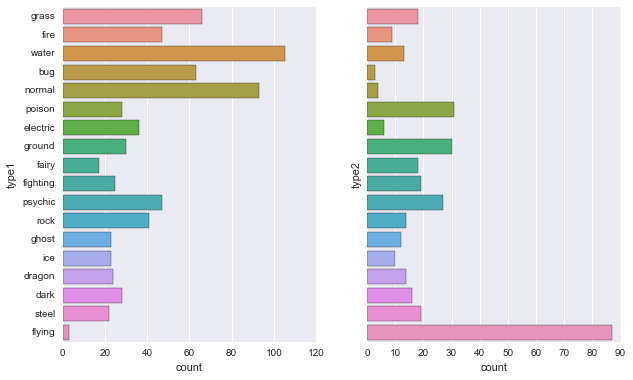

In [32]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

sns.countplot(ax = ax1, y=pk['type1'], order = pk['type1'].unique(), orient = 'h')
sns.countplot(ax = ax2, y=pk['type2'], order = pk['type1'].unique(), orient = 'h')

#### <ul> <u>Notes:</u> 
<li> Capture_Rate and Gender_Rate seem to have large type differences. We may be able to train the data to predict these numbers. </li> <li> Majority of pokemon associated with flying type, have it as their secondary type. This explains the huge discrepancy in the top two graphs.</li> </ul>

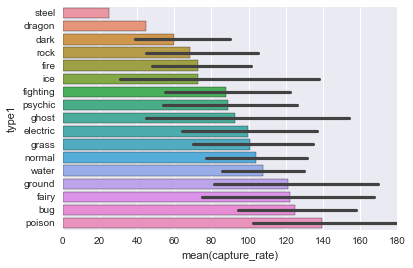

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pk = pd.read_csv('pokemon_data.csv')


# Analyzing capture rate for only Generation 1 and 2, to extract all available types

rates = {}
for typ in pk['type1'].loc[pk['generation_id'] < 3].unique():
    rates[pk['capture_rate'].loc[(pk['type1'] == typ) & (pk['generation_id'] < 3)].mean()] = typ

rates = [rates[i] for i in sorted(rates)]
                 
%matplotlib inline
                 
sns.barplot(x=pk['capture_rate'].loc[pk['generation_id'] < 3], y=pk['type1'], orient = 'h', order = rates)

#### The mean capture rate for generations 1 and 2 has a similar trend to the trend for all generations. However, there are still large error bars for each type. As you can see, flying pokemon did not make it to the graph because it mostly a secondary type.

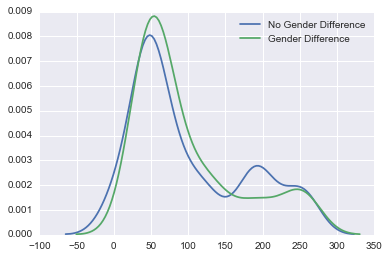

In [5]:
sns.kdeplot(pk['capture_rate'].loc[pk['has_gender_differences'] == 0], label='No Gender Difference')
sns.kdeplot(pk['capture_rate'].loc[pk['has_gender_differences'] == 1], label='Gender Difference')

#### What This Says: <ol>
<li> Pokemon with no gender differences have a higher capture_rate than pokemon with gender differences </li> <li> A high proportion of pokemon with gender differences have a low capture_rate compared to those without gender differences </li> </ol>

#### What This Could Mean: <ol>
<li> Pokemon with gender differences are special </li>
<li> The fact that the creators put effort into creating visual differences, implies that they thought these pokemon were special/important enough to have these differences. </li>
<li> Pokemon that are more difficult to capture tend to be special and vice-versa. </li></ol>

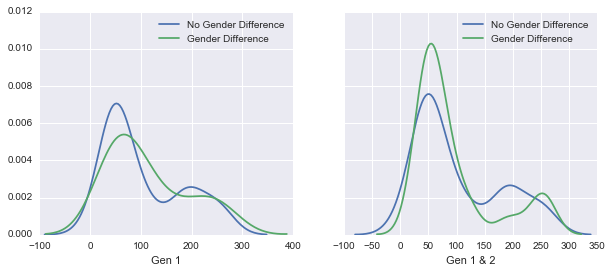

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.kdeplot(ax=ax1, data=pk['capture_rate'].loc[(pk['has_gender_differences'] == 0) & (pk['generation_id'] == 1)], label='No Gender Difference')
sns.kdeplot(ax=ax1, data=pk['capture_rate'].loc[(pk['has_gender_differences'] == 1) & (pk['generation_id'] == 1)], label='Gender Difference')
ax1.set_xlabel('Gen 1')

sns.kdeplot(ax=ax2, data=pk['capture_rate'].loc[(pk['has_gender_differences'] == 0) & (pk['generation_id'] < 3)], label='No Gender Difference')
sns.kdeplot(ax=ax2, data=pk['capture_rate'].loc[(pk['has_gender_differences'] == 1) & (pk['generation_id'] < 3)], label='Gender Difference')
ax2.set_xlabel('Gen 1 & 2')

#####  This trend does not appear until Generation 2

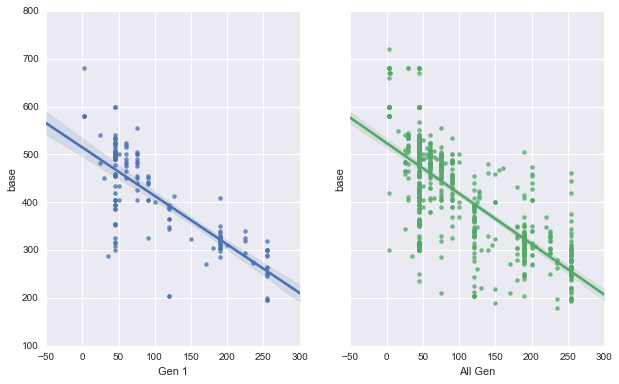

In [15]:
pk['base'] = pk['hp'] + pk['speed'] + pk['special-attack'] + pk['special-defense'] + pk['attack'] + pk['defense']

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

sns.regplot(ax=ax1, x=pk["capture_rate"].loc[pk['generation_id'] == 1], y=pk["base"].loc[pk['generation_id'] == 1])
ax1.set_xlabel('Gen 1')
sns.regplot(ax=ax2, x=pk["capture_rate"], y=pk["base"])
ax2.set_xlabel('All Gen')

##### Base refers to the combined base stats of the pokemon. 
        As expected, the lower the base stats of the pokemon, the easier they are to capture.
        
        

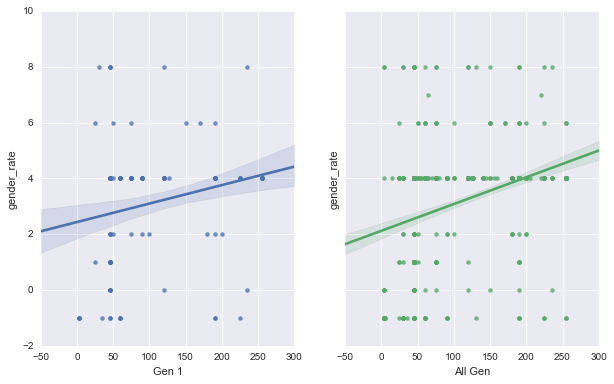

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

sns.regplot(ax=ax1, x=pk["capture_rate"].loc[pk['generation_id'] == 1], y=pk["gender_rate"].loc[pk['generation_id'] == 1])
ax1.set_xlabel('Gen 1')
sns.regplot(ax=ax2, x=pk["capture_rate"], y=pk["gender_rate"])
ax2.set_xlabel('All Gen')

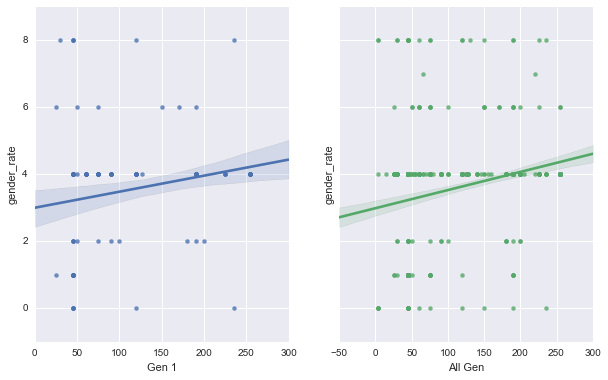

In [22]:
# Remove genderless pokemon

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

sns.regplot(ax=ax1, x=pk["capture_rate"].loc[(pk['generation_id'] == 1) & (pk['gender_rate'] != -1)], y=pk["gender_rate"].loc[(pk['generation_id'] == 1) & (pk['gender_rate'] != -1)])
ax1.set_xlabel('Gen 1')
sns.regplot(ax=ax2, x=pk["capture_rate"].loc[pk['gender_rate'] != -1], y=pk["gender_rate"].loc[pk['gender_rate'] != -1])
ax2.set_xlabel('All Gen')

##### <ol> Gender Rate vs. Capture Rate:
<li> In the top graphs, we see that if a pokemon is more likely to be female, they are easier to capture. </li> <li> Pokemon that are genderless are denoted with '-1'. This may have skewed the male side of the data in the top graphs </li> <li> After removing this feature, the bottom graphs display that the trend is less pronounced but still there </li></ol>

In [75]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

pk = pd.read_csv('pokemon_data.csv')
pk['base'] = pk['hp'] + pk['speed'] + pk['special-attack'] + pk['special-defense'] + pk['attack'] + pk['defense']

le = LabelEncoder()
pk['type1'] = le.fit_transform(pk["type1"])

pk1 = pk.loc[pk['generation_id'] == 1]

X = pd.concat([pk1['base'], pk1['gender_rate']], axis=1)
y = pk1['capture_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

avg_score = 0
etr = ExtraTreesRegressor(n_estimators=100, oob_score = True, bootstrap=True, max_features=None)
for i in range(50):
    etr.fit(X_train, y_train)
    y_pred = etr.predict(X_test)
    avg_score = avg_score + metrics.r2_score(y_test, y_pred)
    
avg_score = avg_score/50
print avg_score



0.829550394789


In [76]:
etr.feature_importances_

array([ 0.81670782,  0.18329218])

In [77]:
X_test.head()

,base,gender_rate
36,299,6
71,335,4
60,385,4
149,680,-1
8,530,1


##### Conclusion:

The combined base stats was the largest predictor for capture rate in the data set. Unexpectedly, gender rate was also strong predictor in this case. After observing and testing the graphs that measured capture_rate against 'type1' and 'has_gender_differences' respectively, I found that they were not good predictors of the data.

Some other variables that have not been added that could help with prediction are:
- Weight (Are heavier pokemon harder to capture?)
- Is_Starter (Starters and their evolutions seem to have an equal capture rate)
- Evolution_Chain_Number (What number in the evolution chain is this pokemon? Ex: Charizard = 3)